# Import Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score, mean_squared_error
import sklearn.metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# Import CSV's

In [2]:
oct_2019 = pd.read_csv('2019-Oct.csv')

In [3]:
nov_2019 = pd.read_csv('2019-Nov.csv')

In [4]:
dec_2019 = pd.read_csv('2019-Dec.csv')

In [5]:
jan_2020 = pd.read_csv('2020-Jan.csv')

In [6]:
feb_2020 = pd.read_csv('2020-Feb.csv')

# Look into CSV's

In [7]:
oct_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4102283 entries, 0 to 4102282
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 281.7+ MB


In [8]:
oct_2019.head(1)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885


In [9]:
nov_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4635837 entries, 0 to 4635836
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 318.3+ MB


In [10]:
nov_2019.head(1)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241


In [11]:
dec_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3533286 entries, 0 to 3533285
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 242.6+ MB


In [12]:
dec_2019.head(1)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc


In [13]:
jan_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4264752 entries, 0 to 4264751
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 292.8+ MB


In [14]:
jan_2020.head(1)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-01-01 00:00:00 UTC,view,5809910,1602943681873052386,NaN,grattol,5.24,595414620,4adb70bb-edbd-4981-b60f-a05bfd32683a


In [15]:
feb_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4156682 entries, 0 to 4156681
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 285.4+ MB


In [16]:
feb_2020.head(1)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-02-01 00:00:01 UTC,cart,5844305,1487580006317032337,NaN,NaN,2.14,485174092,4be9643a-420b-4c6b-83dd-a15e772fbf7a


# Data Cleaning

Make a copy of all the dataframes to not change the original.

In [17]:
oct_2019_cp = oct_2019.copy()
nov_2019_cp = nov_2019.copy()
dec_2019_cp = dec_2019.copy()
jan_2020_cp = jan_2020.copy()
feb_2020_cp = feb_2020.copy()

Drop 'category_code' column since it will not be needed for analysis.

In [18]:
def drop_catcode(df):
    df = df.drop(columns=['category_code'])
    return df
    
oct_2019_cp = drop_catcode(oct_2019_cp)
nov_2019_cp = drop_catcode(nov_2019_cp)
dec_2019_cp = drop_catcode(dec_2019_cp)
jan_2020_cp = drop_catcode(jan_2020_cp)
feb_2020_cp = drop_catcode(feb_2020_cp)

Count the nulls in each df

In [19]:
def count_null(df):
    if df.event_time.str[5:7][0] == '10':
        name = 'Oct 2019'
    if df.event_time.str[5:7][0] == '11':
        name = 'Nov 2019'
    if df.event_time.str[5:7][0] == '12':
        name = 'Dec 2019'
    if df.event_time.str[5:7][0] == '01':
        name = 'Jan 2020'
    if df.event_time.str[5:7][0] == '02':
        name = 'Feb 2020'
    print(f'{name} event_time nulls:',df.event_time.isna().sum())
    print(f'{name} event_type nulls:',df.event_type.isna().sum())
    print(f'{name} product_id nulls:',df.product_id.isna().sum())
    print(f'{name} category_id nulls:',df.category_id.isna().sum())
    print(f'{name} brand nulls:',df.brand.isna().sum())
    print(f'{name} price nulls:',df.price.isna().sum())
    print(f'{name} user_id nulls:',df.user_id.isna().sum())
    print(f'{name} user_session nulls:',df.user_session.isna().sum())

In [20]:
count_null(oct_2019_cp)

Oct 2019 event_time nulls: 0
Oct 2019 event_type nulls: 0
Oct 2019 product_id nulls: 0
Oct 2019 category_id nulls: 0
Oct 2019 brand nulls: 1659261
Oct 2019 price nulls: 0
Oct 2019 user_id nulls: 0
Oct 2019 user_session nulls: 637


In [21]:
count_null(nov_2019_cp)

Nov 2019 event_time nulls: 0
Nov 2019 event_type nulls: 0
Nov 2019 product_id nulls: 0
Nov 2019 category_id nulls: 0
Nov 2019 brand nulls: 1986029
Nov 2019 price nulls: 0
Nov 2019 user_id nulls: 0
Nov 2019 user_session nulls: 813


In [22]:
count_null(dec_2019_cp)

Dec 2019 event_time nulls: 0
Dec 2019 event_type nulls: 0
Dec 2019 product_id nulls: 0
Dec 2019 category_id nulls: 0
Dec 2019 brand nulls: 1510289
Dec 2019 price nulls: 0
Dec 2019 user_id nulls: 0
Dec 2019 user_session nulls: 779


In [23]:
count_null(jan_2020_cp)

Jan 2020 event_time nulls: 0
Jan 2020 event_type nulls: 0
Jan 2020 product_id nulls: 0
Jan 2020 category_id nulls: 0
Jan 2020 brand nulls: 1775630
Jan 2020 price nulls: 0
Jan 2020 user_id nulls: 0
Jan 2020 user_session nulls: 1314


In [24]:
count_null(feb_2020_cp)

Feb 2020 event_time nulls: 0
Feb 2020 event_type nulls: 0
Feb 2020 product_id nulls: 0
Feb 2020 category_id nulls: 0
Feb 2020 brand nulls: 1825908
Feb 2020 price nulls: 0
Feb 2020 user_id nulls: 0
Feb 2020 user_session nulls: 1055


Remove Nulls & Reset Index

In [25]:
def rem_null(df):
    df = df.loc[df.user_session.notnull()].reset_index()
    df = df.loc[df.brand.notnull()].reset_index()
    return df

In [26]:
oct_2019_cp = rem_null(oct_2019_cp)
nov_2019_cp = rem_null(nov_2019_cp)
dec_2019_cp = rem_null(dec_2019_cp)
jan_2020_cp = rem_null(jan_2020_cp)
feb_2020_cp = rem_null(feb_2020_cp)

Check that nulls were removed

In [27]:
count_null(oct_2019_cp)

Oct 2019 event_time nulls: 0
Oct 2019 event_type nulls: 0
Oct 2019 product_id nulls: 0
Oct 2019 category_id nulls: 0
Oct 2019 brand nulls: 0
Oct 2019 price nulls: 0
Oct 2019 user_id nulls: 0
Oct 2019 user_session nulls: 0


In [28]:
count_null(nov_2019_cp)

Nov 2019 event_time nulls: 0
Nov 2019 event_type nulls: 0
Nov 2019 product_id nulls: 0
Nov 2019 category_id nulls: 0
Nov 2019 brand nulls: 0
Nov 2019 price nulls: 0
Nov 2019 user_id nulls: 0
Nov 2019 user_session nulls: 0


In [29]:
count_null(dec_2019_cp)

Dec 2019 event_time nulls: 0
Dec 2019 event_type nulls: 0
Dec 2019 product_id nulls: 0
Dec 2019 category_id nulls: 0
Dec 2019 brand nulls: 0
Dec 2019 price nulls: 0
Dec 2019 user_id nulls: 0
Dec 2019 user_session nulls: 0


In [30]:
count_null(jan_2020_cp)

Jan 2020 event_time nulls: 0
Jan 2020 event_type nulls: 0
Jan 2020 product_id nulls: 0
Jan 2020 category_id nulls: 0
Jan 2020 brand nulls: 0
Jan 2020 price nulls: 0
Jan 2020 user_id nulls: 0
Jan 2020 user_session nulls: 0


In [31]:
count_null(feb_2020_cp)

Feb 2020 event_time nulls: 0
Feb 2020 event_type nulls: 0
Feb 2020 product_id nulls: 0
Feb 2020 category_id nulls: 0
Feb 2020 brand nulls: 0
Feb 2020 price nulls: 0
Feb 2020 user_id nulls: 0
Feb 2020 user_session nulls: 0


Find price range

In [32]:
print('Min:', oct_2019_cp.price.min(), 'Max:', oct_2019_cp.price.max())
print('Min:', nov_2019_cp.price.min(), 'Max:', nov_2019_cp.price.max())
print('Min:', dec_2019_cp.price.min(), 'Max:', dec_2019_cp.price.max())
print('Min:', jan_2020_cp.price.min(), 'Max:', jan_2020_cp.price.max())
print('Min:', feb_2020_cp.price.min(), 'Max:', feb_2020_cp.price.max())

Min: 0.0 Max: 307.6
Min: 0.0 Max: 327.78
Min: 0.0 Max: 327.78
Min: 0.0 Max: 327.78
Min: 0.06 Max: 327.78


# Change event_time column

Function splits the string of event_time into individual columns

In [33]:
def add_time_cols(df):
    df['date'] = df.event_time.str[:10]
    df['year'] = df.event_time.str[:4]
    df['month'] = df.event_time.str[5:7]
    df['day'] = df.event_time.str[8:10]
    df['time_utc'] = df.event_time.str[11:19]
    return df

In [34]:
oct_2019_cp = add_time_cols(oct_2019_cp)
nov_2019_cp = add_time_cols(nov_2019_cp)
dec_2019_cp = add_time_cols(dec_2019_cp)
jan_2020_cp = add_time_cols(jan_2020_cp)
feb_2020_cp = add_time_cols(feb_2020_cp)

# Datetime Conversion

Function converts the column 'date' into datetime

In [35]:
def date_conversion(df):
    df['date'] = pd.to_datetime(df['date'])
    return df

oct_2019_cp = date_conversion(oct_2019_cp)
nov_2019_cp = date_conversion(nov_2019_cp)
dec_2019_cp = date_conversion(dec_2019_cp)
jan_2020_cp = date_conversion(jan_2020_cp)
feb_2020_cp = date_conversion(feb_2020_cp)

Function creates a column 'dow' representing day of the week, where Monday = 0 and Sunday = 6

In [36]:
def dow(df):
    df['dow'] = df.date.dt.dayofweek
    return df

oct_2019_cp = dow(oct_2019_cp)
nov_2019_cp = dow(nov_2019_cp)
dec_2019_cp = dow(dec_2019_cp)
jan_2020_cp = dow(jan_2020_cp)
feb_2020_cp = dow(feb_2020_cp)

Function reorders the columns

In [37]:
def reorder_col(df):
    df = df[['date','year','month','day','dow','time_utc','event_type','product_id','category_id','brand','price','user_id','user_session']]
    return df

oct_2019_cp = reorder_col(oct_2019_cp)
nov_2019_cp = reorder_col(nov_2019_cp)
dec_2019_cp = reorder_col(dec_2019_cp)
jan_2020_cp = reorder_col(jan_2020_cp)
feb_2020_cp = reorder_col(feb_2020_cp)    

In [38]:
oct_2019_cp.head(1)

,date,year,month,day,dow,time_utc,event_type,product_id,category_id,brand,price,user_id,user_session
0,2019-10-01,2019,10,01,1,00:00:00,cart,5773203,1487580005134238553,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885


In [39]:
nov_2019_cp.head(1)

,date,year,month,day,dow,time_utc,event_type,product_id,category_id,brand,price,user_id,user_session
0,2019-11-01,2019,11,01,4,00:00:10,view,5837166,1783999064103190764,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f


In [40]:
dec_2019_cp.head(1)

,date,year,month,day,dow,time_utc,event_type,product_id,category_id,brand,price,user_id,user_session
0,2019-12-01,2019,12,01,6,00:00:00,remove_from_cart,5712790,1487580005268456287,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc


In [41]:
jan_2020_cp.head(1)

,date,year,month,day,dow,time_utc,event_type,product_id,category_id,brand,price,user_id,user_session
0,2020-01-01,2020,01,01,2,00:00:00,view,5809910,1602943681873052386,grattol,5.24,595414620,4adb70bb-edbd-4981-b60f-a05bfd32683a


In [42]:
feb_2020_cp.head(1)

,date,year,month,day,dow,time_utc,event_type,product_id,category_id,brand,price,user_id,user_session
0,2020-02-01,2020,02,01,5,00:00:03,view,5769925,1487580013841613016,kapous,4.22,594621622,a88baf11-9cd0-4362-bde4-1bfeed3f641d


# Append rows together to make one final dataframe

In [43]:
oct_2019_nov_2019 = oct_2019_cp.append(nov_2019_cp, ignore_index = True)
oct_2019_nov_2019

,date,year,month,day,dow,time_utc,event_type,product_id,category_id,brand,price,user_id,user_session
0,2019-10-01,2019,10,01,1,00:00:00,cart,5773203,1487580005134238553,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01,2019,10,01,1,00:00:03,cart,5773353,1487580005134238553,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01,2019,10,01,1,00:00:07,cart,5881589,2151191071051219817,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01,2019,10,01,1,00:00:07,cart,5723490,1487580005134238553,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01,2019,10,01,1,00:00:15,cart,5881449,1487580013522845895,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5091904,2019-11-30,2019,11,30,5,23:59:27,remove_from_cart,5801131,1487580005486560104,irisk,3.65,566513990,b5053009-b3c4-4581-b05f-6199d1a2037e
5091905,2019-11-30,2019,11,30,5,23:59:32,view,5795387,1487580005713052531,ingarden,7.14,576802932,2dc9ed07-93bb-47db-abe7-e9d88ed7ae94
5091906,2019-11-30,2019,11,30,5,23:59:47,view,5733064,1487580004832248652,beautix,9.37,422196217,ab5e6dd5-8700-4ecc-a300-9f1eca5d1a95
5091907,2019-11-30,2019,11,30,5,23:59:47,view,5867785,1487580007835370453,kims,31.10,572579084,d42865b7-7e04-4038-9be0-a59165625f06


In [44]:
oct_2019_dec_2019 = oct_2019_nov_2019.append(dec_2019_cp, ignore_index = True)
oct_2019_dec_2019

,date,year,month,day,dow,time_utc,event_type,product_id,category_id,brand,price,user_id,user_session
0,2019-10-01,2019,10,01,1,00:00:00,cart,5773203,1487580005134238553,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01,2019,10,01,1,00:00:03,cart,5773353,1487580005134238553,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01,2019,10,01,1,00:00:07,cart,5881589,2151191071051219817,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01,2019,10,01,1,00:00:07,cart,5723490,1487580005134238553,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01,2019,10,01,1,00:00:15,cart,5881449,1487580013522845895,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7114399,2019-12-31,2019,12,31,1,23:58:13,view,5869134,1783999064136745198,cosmoprofi,6.35,397780878,7e8a2b85-153a-44eb-a71f-b748fde14fcc
7114400,2019-12-31,2019,12,31,1,23:58:35,cart,5622677,1487580007281722301,severina,3.16,502631750,6edb4c0e-285c-4fbc-8977-589ef6d326b8
7114401,2019-12-31,2019,12,31,1,23:59:37,view,5834173,2151191070908613477,runail,2.62,595411904,74ca1cd5-5381-4ffe-b00b-a258b390db77
7114402,2019-12-31,2019,12,31,1,23:59:39,view,5683350,1487580005671109489,masura,2.84,536812729,e4a2d47c-a956-4c46-8176-745f52ea664b


In [45]:
oct_2019_jan_2020 = oct_2019_dec_2019.append(jan_2020_cp, ignore_index = True)
oct_2019_jan_2020

,date,year,month,day,dow,time_utc,event_type,product_id,category_id,brand,price,user_id,user_session
0,2019-10-01,2019,10,01,1,00:00:00,cart,5773203,1487580005134238553,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01,2019,10,01,1,00:00:03,cart,5773353,1487580005134238553,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01,2019,10,01,1,00:00:07,cart,5881589,2151191071051219817,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01,2019,10,01,1,00:00:07,cart,5723490,1487580005134238553,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01,2019,10,01,1,00:00:15,cart,5881449,1487580013522845895,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9602665,2020-01-31,2020,01,31,4,23:59:43,remove_from_cart,5751422,1487580005268456287,uno,10.95,607092857,a4ccd1c4-a9d2-48d0-9816-082ec5bb5e47
9602666,2020-01-31,2020,01,31,4,23:59:43,remove_from_cart,5751422,1487580005268456287,uno,10.95,607092857,a4ccd1c4-a9d2-48d0-9816-082ec5bb5e47
9602667,2020-01-31,2020,01,31,4,23:59:44,view,5877031,1487580010100293687,milv,3.49,564814969,fc7063a6-b45e-4863-babb-da4934b83388
9602668,2020-01-31,2020,01,31,4,23:59:47,view,5870076,1783999064136745198,grattol,5.71,583267679,2806ff10-08bc-4811-9ab7-af074fe22a88


In [46]:
oct_2019_feb_2020 = oct_2019_jan_2020.append(feb_2020_cp, ignore_index = True)
oct_2019_feb_2020

,date,year,month,day,dow,time_utc,event_type,product_id,category_id,brand,price,user_id,user_session
0,2019-10-01,2019,10,01,1,00:00:00,cart,5773203,1487580005134238553,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01,2019,10,01,1,00:00:03,cart,5773353,1487580005134238553,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01,2019,10,01,1,00:00:07,cart,5881589,2151191071051219817,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01,2019,10,01,1,00:00:07,cart,5723490,1487580005134238553,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01,2019,10,01,1,00:00:15,cart,5881449,1487580013522845895,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11932749,2020-02-29,2020,02,29,5,23:59:21,view,5467,1487580005713052531,ingarden,8.29,618860454,5d3d51d6-ca15-432f-99c6-bc232bb49b1f
11932750,2020-02-29,2020,02,29,5,23:59:32,view,5885416,1487580005092295511,grattol,6.27,622082947,fb29909b-6ef5-4662-b4ee-288e73e5dc10
11932751,2020-02-29,2020,02,29,5,23:59:45,view,5850628,1602943681873052386,grattol,5.24,622090043,ab7d349f-db5d-4790-8ab1-31e5c894459d
11932752,2020-02-29,2020,02,29,5,23:59:54,view,5716351,1487580010872045658,irisk,0.79,619841242,18af673b-7fb9-4202-a66d-5c855bc0fd2d


# Export CSV

In [47]:
#oct_2019_feb_2020.to_csv('oct_2019_feb_2020.csv', index=False)

# Modeling

In [48]:
from darts import TimeSeries
from darts.models import (
    NaiveSeasonal,
    NaiveDrift,
    #Prophet,
    ExponentialSmoothing,
    ARIMA,
    AutoARIMA,
    StandardRegressionModel,
    Theta,
    FFT,
    forecasting_model
)
from darts.metrics import mape, mase
from darts.backtesting import (
    backtest_forecasting,
    backtest_regression,
    plot_residuals_analysis,
    forecasting_residuals
)
from darts.utils.statistics import check_seasonality, plot_acf

import warnings
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)
import ipywidgets as widgets
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge

Importing plotly failed. Interactive plots will not work.


In [49]:
purchases = oct_2019_feb_2020.loc[oct_2019_feb_2020.event_type == 'purchase']

In [50]:
revenue_date = purchases.groupby('date')['price'].sum().reset_index()
revenue_date

,date,price
0,2019-10-01,26917.43
1,2019-10-02,27912.61
2,2019-10-03,27170.12
3,2019-10-04,22412.60
4,2019-10-05,18577.86
...,...,...
147,2020-02-25,29034.17
148,2020-02-26,26852.89
149,2020-02-27,27085.15
150,2020-02-28,24479.07


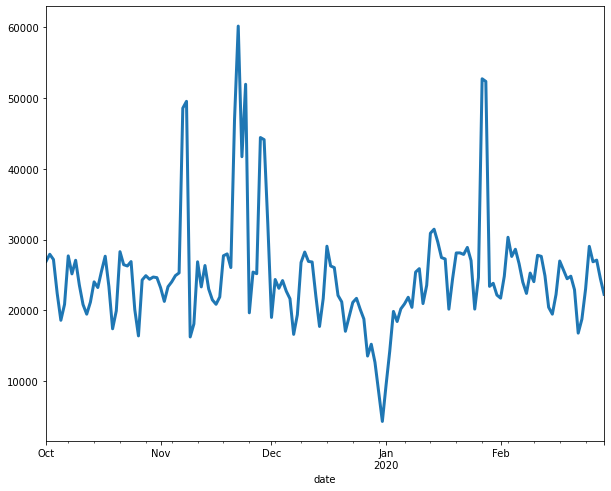

In [51]:
series = TimeSeries.from_dataframe(revenue_date, 'date', ['price'])
plt.figure(figsize=(10,8))
series.plot(lw=3)

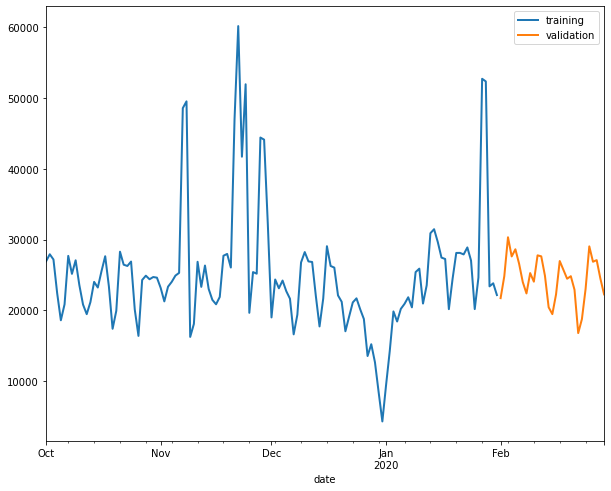

In [52]:
train, val = series.split_before(pd.Timestamp('2020-02-01'))
plt.figure(figsize=(10,8))
train.plot(lw=2, label='training')
val.plot(lw=2, label='validation')
plt.legend();

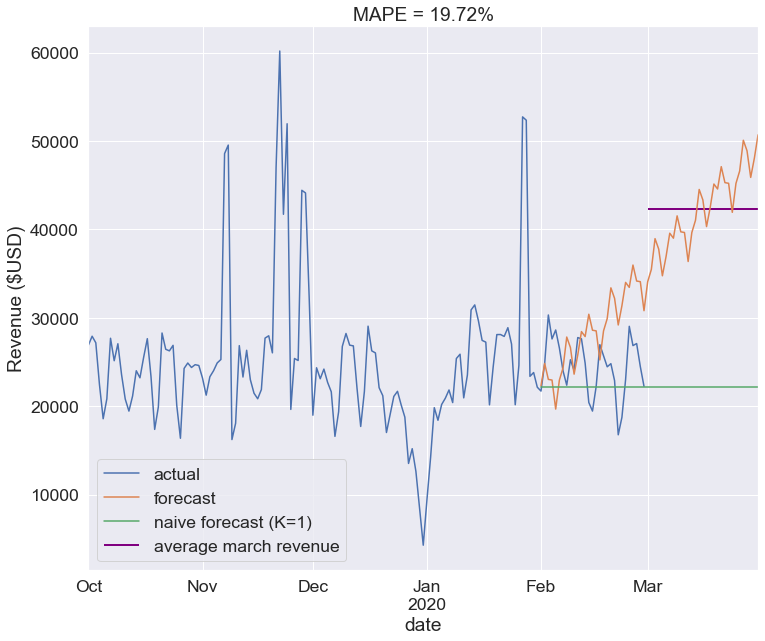

In [88]:
def eval_model(model):
    naive_model = NaiveSeasonal(K=1)
    naive_model.fit(train)
    naive_forecast = naive_model.predict(60)
    model.fit(train)
    forecast = model.predict(60)
    mar = pd.date_range('2020-03-01', '2020-03-31')
    #avg_mar = np.mean(mar)
    #print('model {} obtains MAPE: {:.2f}%'.format(model, mape(val, forecast)))
    #print(forecast)
    plt.figure(figsize=(12,10))
    sns.set(font_scale=1.6)
    series.plot(label='actual')
    forecast.plot(label='forecast')
    naive_forecast.plot(label='naive forecast (K=1)')
    plt.hlines(42250.699142, min(mar), max(mar), label='average march revenue', color='purple', lw=2)
    plt.title('MAPE = {:.2f}%'.format(mape(forecast, series)))
    plt.ylabel('Revenue ($USD)')
    plt.legend();

eval_model(ExponentialSmoothing())

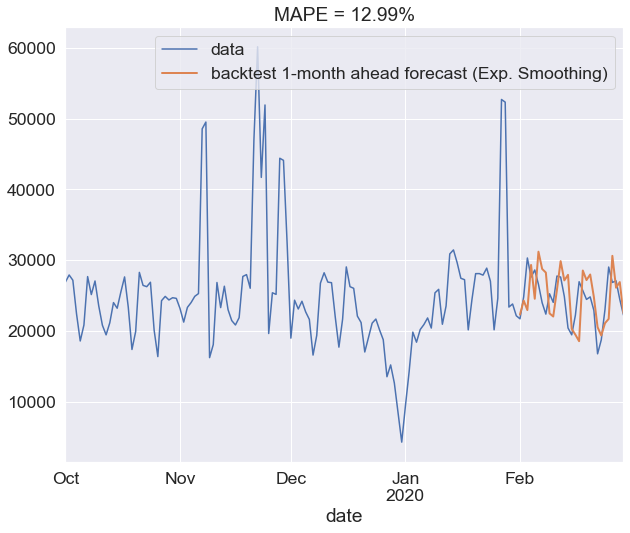

In [54]:
model_es = ExponentialSmoothing()
historical_fcast_es = backtest_forecasting(series, model_es, pd.Timestamp('2020-02-01'), fcast_horizon_n=1, verbose=True)
plt.figure(figsize=(10,8))
series.plot(label='data')
historical_fcast_es.plot(lw=2, label='backtest 1-month ahead forecast (Exp. Smoothing)')
plt.title('MAPE = {:.2f}%'.format(mape(historical_fcast_es, series)))
plt.legend()

In [83]:
model = ExponentialSmoothing()
model.fit(train)
forecast = model.predict(60)
mar = forecast[29:]
print(np.mean(mar))

0    42250.699142
dtype: float64
